In [2]:
#combining all code into one cell
import torch
import torch.nn as nn
import torch.nn.functional as F
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np

# Set manual seed
torch.manual_seed(41)

# Load dataset, replace class names with integers
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets.replace({
    'class': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})

# Split dataset into training and test sets
# Note: X and y are pandas DataFrames/Series, so we need to convert them to numpy arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert to tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(np.array(y_train).squeeze())
y_test = torch.LongTensor(np.array(y_test).squeeze())

# Define model class
class Model(nn.Module):
    def __init__(self, input_features=4, h1=8, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.out = nn.Linear(h1, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.out(x)

# Initialize model, loss, and optimizer
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
model.train()
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    if i % 10 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Check gradients
print("\nfc1 weight gradients:\n", model.fc1.weight.grad)



Epoch 0, Loss: 1.1720043420791626
Epoch 10, Loss: 0.818459689617157
Epoch 20, Loss: 0.6545163989067078
Epoch 30, Loss: 0.5240808129310608
Epoch 40, Loss: 0.43139827251434326
Epoch 50, Loss: 0.3638036549091339
Epoch 60, Loss: 0.3063233196735382
Epoch 70, Loss: 0.2562718689441681
Epoch 80, Loss: 0.21410158276557922
Epoch 90, Loss: 0.1800335943698883

fc1 weight gradients:
 tensor([[ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [ 0.0045,  0.0063, -0.0185, -0.0137],
        [-0.0009,  0.0101, -0.0215, -0.0099],
        [-0.0163, -0.0166,  0.0328,  0.0261],
        [ 0.0000,  0.0000,  0.0000,  0.0000],
        [-0.0239, -0.0206,  0.0293,  0.0258],
        [ 0.0000,  0.0000,  0.0000,  0.0000]])


/var/folders/tv/l68gvpr530b23whvlxhdx5ww0000gn/T/ipykernel_61354/1015379775.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = iris.data.targets.replace({


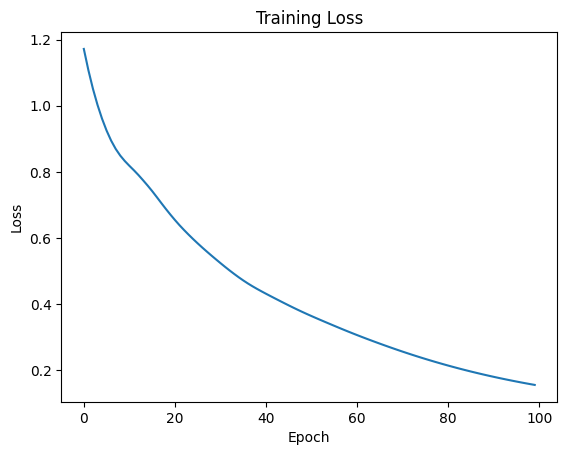

In [3]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


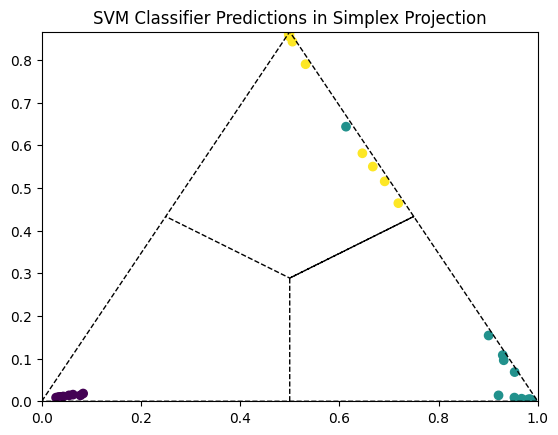

In [4]:
# Create and train the SVC
from sklearn.svm import SVC

def project_to_simplex(data):
    return np.dot(data, np.array([[0,0], [1,0], [ 0.5, np.sqrt(3)/2]]))

svm = SVC(kernel='linear', gamma='auto', C=1, random_state=42, probability=True)
svm.fit(X_train, y_train)
predictions = np.around(svm.predict_proba(X_test), 3)
plt.scatter(project_to_simplex(predictions)[:,0], project_to_simplex(predictions)[:,1], c=y_test)
plt.plot([0.5, 0.5, 0.75, 0.5, 0.25], [0, np.sqrt(3)/6, 0.433, np.sqrt(3)/6, 0.433], 'k--', lw=1)  
plt.plot([0, 0.5, 1, 0], [0, np.sqrt(3)/2, 0, 0], 'k--', lw=1)

plt.title('SVM Classifier Predictions in Simplex Projection')
plt.xlim((0,1))
plt.ylim((0,np.sqrt(3)/2))
plt.show()